In [12]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from sklearn.linear_model import LinearRegression as LR
import numpy as np
import pandas as pd
import sympy as sy
import math
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [19]:
x = np.array([0.99, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01, -0.2, -0.11, 0.05, 0.16, 0.29, 0.42, 0.59, 0.73, 0.85, 0.93])
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15, 0.22, 0.32, 0.36, 0.40, 0.41, 0.42, 0.43, 0.42, 0.41, 0.40])
# cs = spi.CubicSpline(x, y, bc_type='periodic')
# print(cs.c)
n = len(x)
h = np.zeros(n)
for i in range(1, n):
    h[i] = x[i] - x[i - 1]

print(h.shape)

(20,)


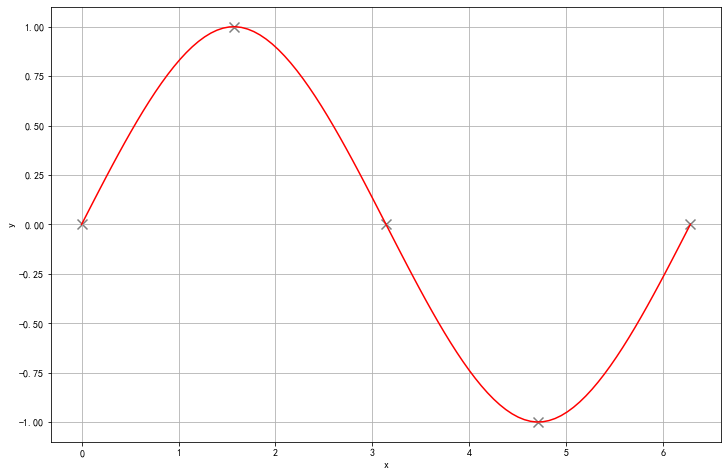

In [3]:
# xx = np.linspace(0, 2 * np.pi, 100)
# fig = plt.figure(figsize=(12,8))
# plt.scatter(x, y, c='gray', marker='x', s=100)
# plt.plot(xx, cs(xx), c='red', label='y=S(x)')
# # plt.plot(xx, np.sin(xx), c='blue', label='y=sin(x)')
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('y')
# # plt.savefig('scipycube.png')
# plt.show()
# plt.close()

In [20]:
X = sy.symbols('x')
M = np.array([132.844467, 5.81807995, 0.498422235, 1.05121076, 1.29673004, 1.03535664, 0.145488381, 2.65380263, -4.63825035, 17.9338799, -52.4602661, -1.75204337, 2.69261527, -4.47153187, 0.998984575, 0.475593925, -3.08129692, 7.48599291, -29.4396877, 132.844467])
S = []
Sc = []

for i in range(1, n):
    Si = sy.simplify(M[i - 1] / (6 * h[i]) * (x[i] - X) ** 3 + M[i] / (6 * h[i]) * (X - x[i - 1]) ** 3 + (y[i] / h[i] - h[i] * M[i] / 6) * (X - x[i - 1]) + (y[i - 1] / h[i] - h[i] * M[i - 1] / 6) * (x[i] - X))
    
#     print(Si)
    Si = sy.Poly(Si)
    S.append(np.poly1d(Si.coeffs()))
    Sc.append(Si.coeffs())
    
#     yu.append(np.poly1d(psi.coeffs()))
#     xu_coeffs.append(phi.coeffs())
#     yu_coeffs.append(psi.coeffs())
print(np.array(Sc))

[[529.276612708333 -1505.52930624375 1428.27604877598 -451.590583273003]
 [11.0826202395833 -28.6764277078125 25.2658127746385 -7.30400765751860]
 [-0.921314208333334 2.65384120125000 -1.99152126347917 0.600619264130875]
 [-0.409198800000000 1.47085460800000 -1.08062166476000 0.366821740542400]
 [0.396020303030303 -0.147635789090909 0.00376699455151464
  0.124641564973091]
 [1.23592813750000 -1.55868095100000 0.793952173246666
  -0.0228596265797333]
 [-2.98608839166667 4.01438086750000 -1.65819493494476 0.336788588983428]
 [8.68101545238095 -6.48601259214286 1.49192309294762 0.0217767881942858]
 [-25.0801447222222 9.71934429166667 -1.10093391200000 0.160062484835556]
 [55.8683698412698 7.29088885476190 -1.07664934188095 0.159981536163492]
 [93.9041161666667 30.1123366500000 3.48764046466111 0.464267556265556]
 [4.62985275000000 0.651829722500000 0.246978123325000 0.345442787933750]
 [-10.8547683939394 2.97452289409091 0.130843694898485 0.347378354069091]
 [7.01348262179487 -5.602237593

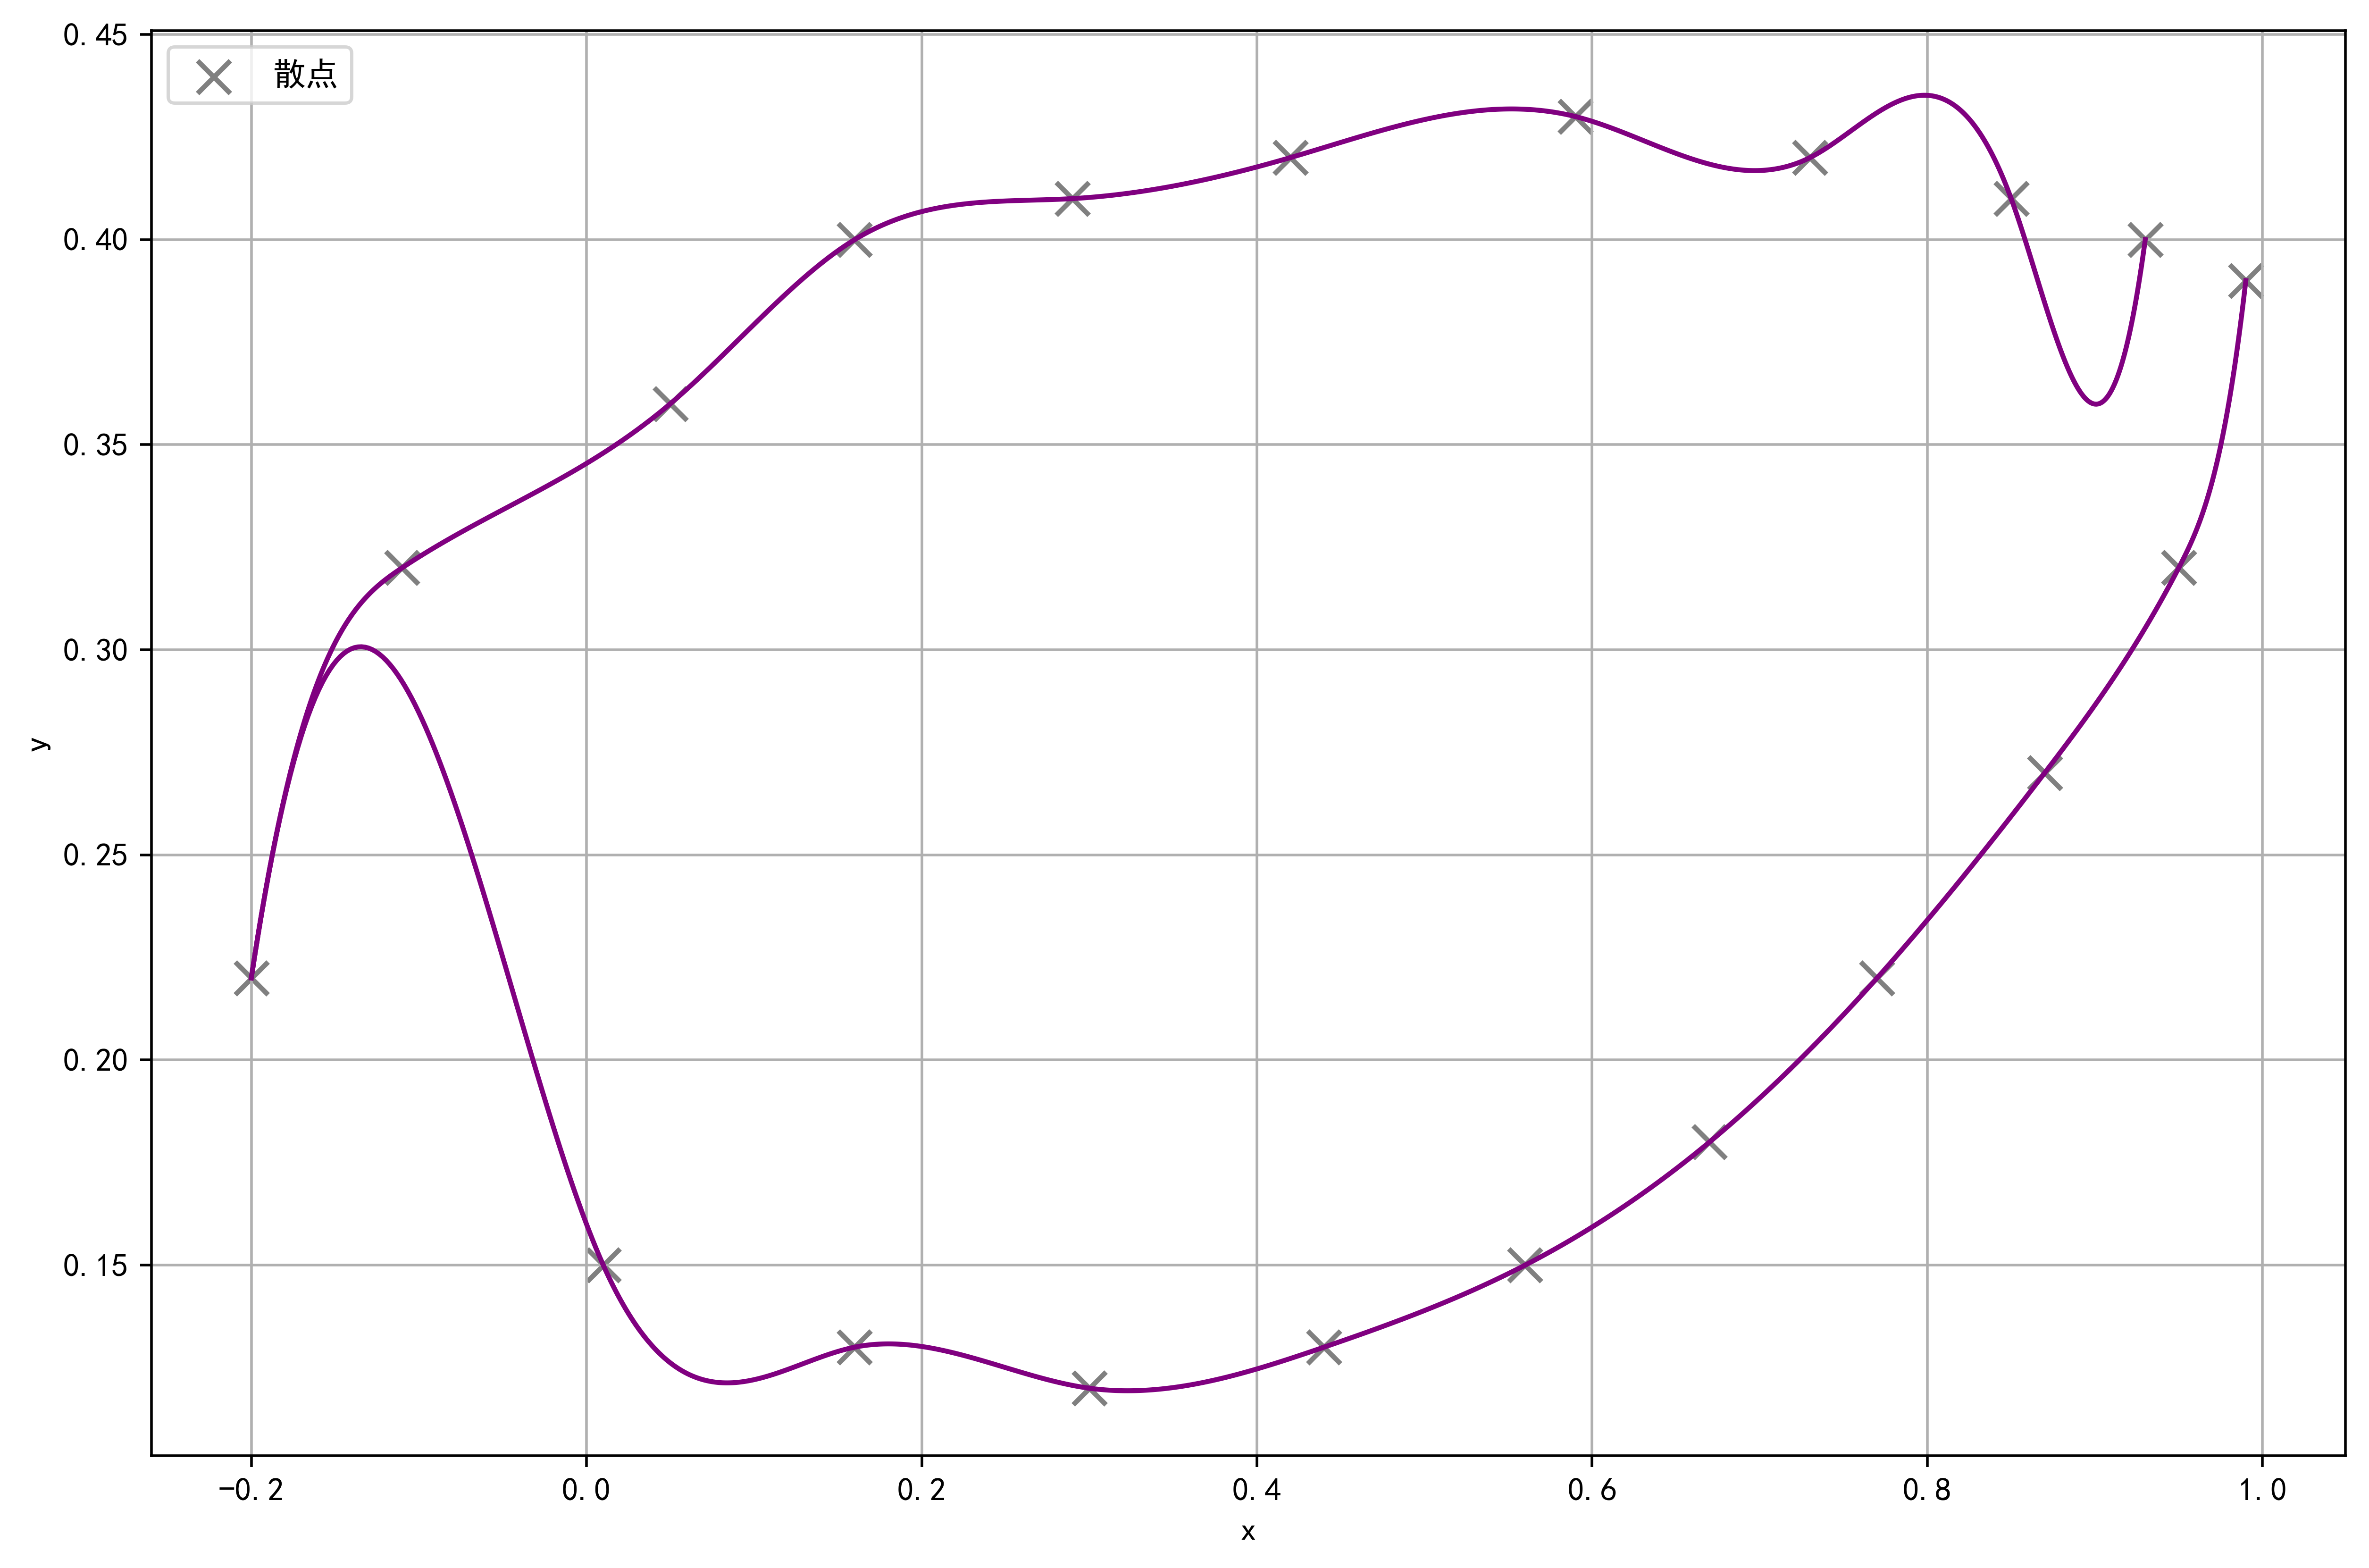

In [21]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=500)

# 分段绘制插值曲线
for i in range(n - 1):
    xx = np.linspace(x[i], x[i + 1], 100)
    plt.plot(xx, S[i](xx), color='purple')
    
# 绘制散点图
ax.scatter(x, y, c='gray', marker='x', s=100, label='散点')

# 图片细节调整
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend(loc='upper left')
plt.show()
plt.close()